In [36]:
from utils.drawing import *
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score , confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

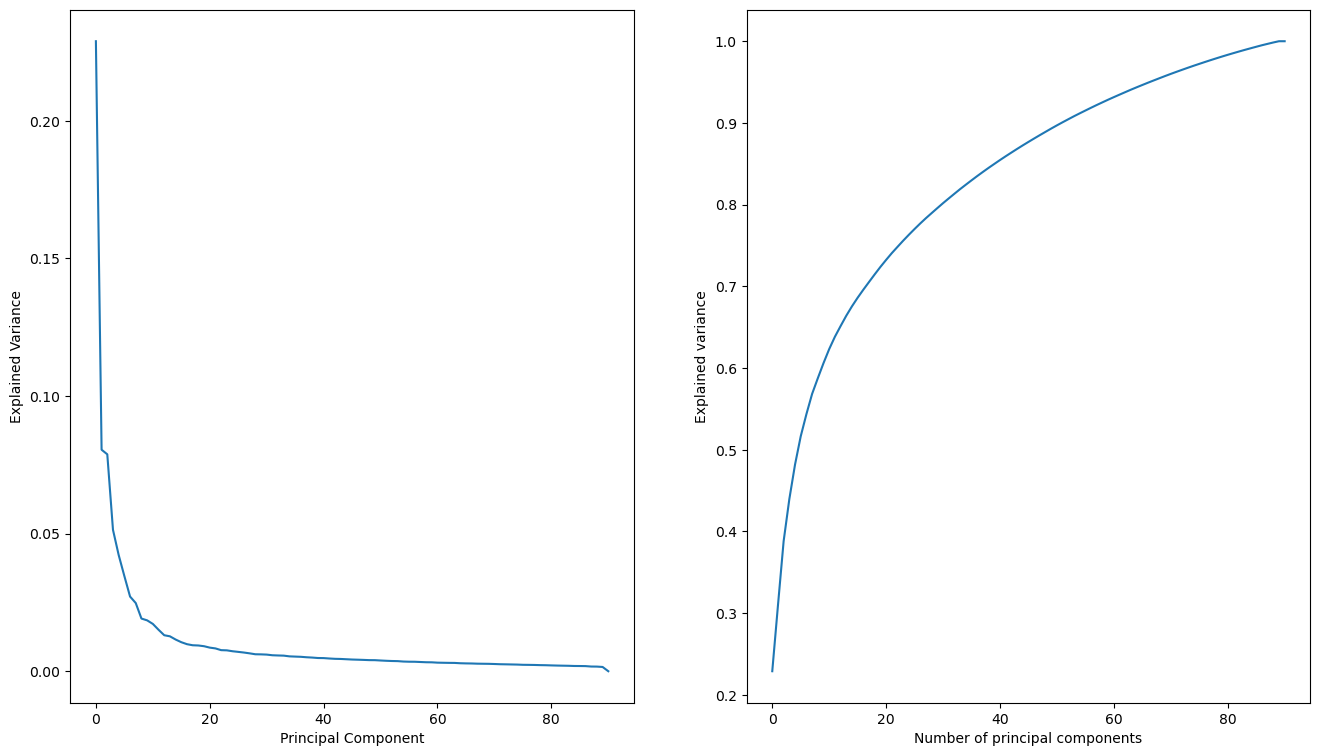

In [37]:
X_train, X_test, y_train, y_test, pca_names, df = load_preprocess_data('../../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                                       ['samples','type'], 'type')

NO SMOTING

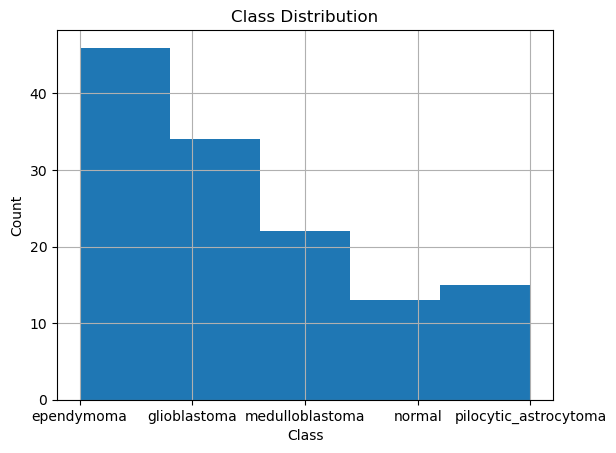

In [38]:
plot_class_distribution(df, 'type')

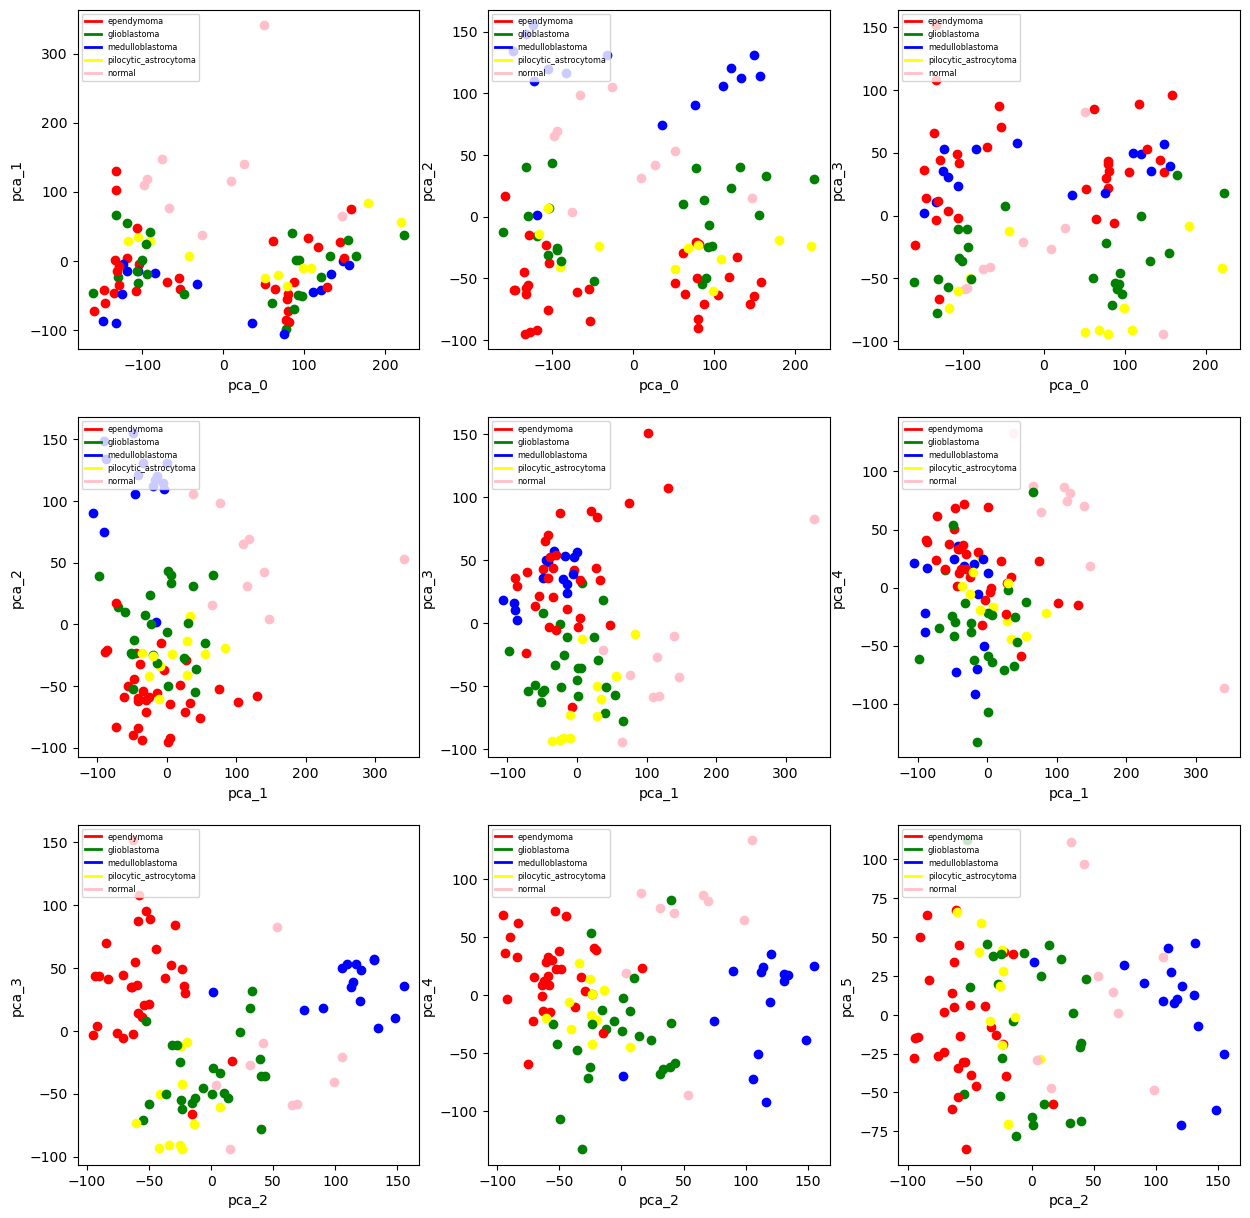

In [39]:
df_pca = pd.DataFrame(X_train, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train) , df_pca)

In [40]:
params = {'weights' : ['uniform', 'distance'],
          'p' : range(1,10)}
estimator_NO_SMOTE = GridSearchCV(KNeighborsClassifier(), param_grid= params, verbose= 3)
estimator_NO_SMOTE.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..............p=1, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END ..............p=1, weights=uniform;, score=0.778 total time=   0.0s
[CV 3/5] END ..............p=1, weights=uniform;, score=0.722 total time=   0.0s
[CV 4/5] END ..............p=1, weights=uniform;, score=0.722 total time=   0.0s
[CV 5/5] END ..............p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 1/5] END .............p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END .............p=1, weights=distance;, score=0.889 total time=   0.0s
[CV 3/5] END .............p=1, weights=distance;, score=0.778 total time=   0.0s
[CV 4/5] END .............p=1, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END .............p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END ..............p=2, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END ..............p=2, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'p': range(1, 10), 'weights': ['uniform', 'distance']},
             verbose=3)

In [41]:
estimator_NO_SMOTE.best_params_

{'p': 2, 'weights': 'distance'}

Accuracy:  0.8974358974358975 F1 score:  0.9005939709637633


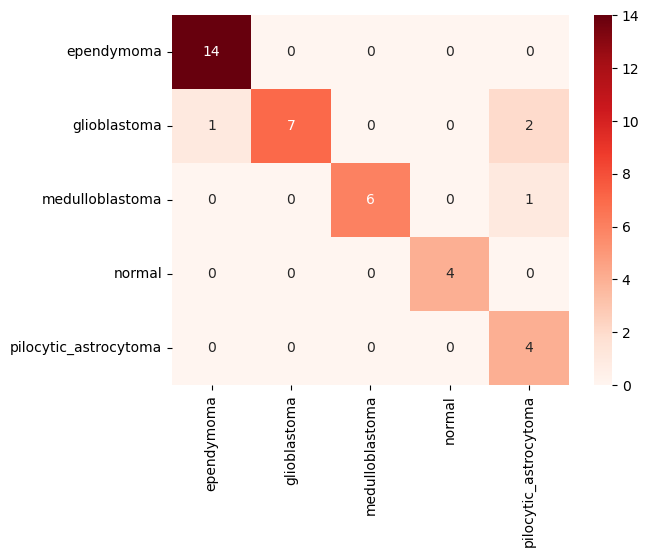

In [42]:
y_predict = estimator_NO_SMOTE.best_estimator_.predict(X_test)

accuracy_NO_SMOTE = accuracy_score(y_test,y_predict)
f1_NO_SMOTE = f1_score(y_test,y_predict, average='weighted')
print('Accuracy: ',accuracy_score(y_test,y_predict),
      'F1 score: ', f1_score(y_test,y_predict, average = 'weighted'))
data = confusion_matrix(y_test, y_predict)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

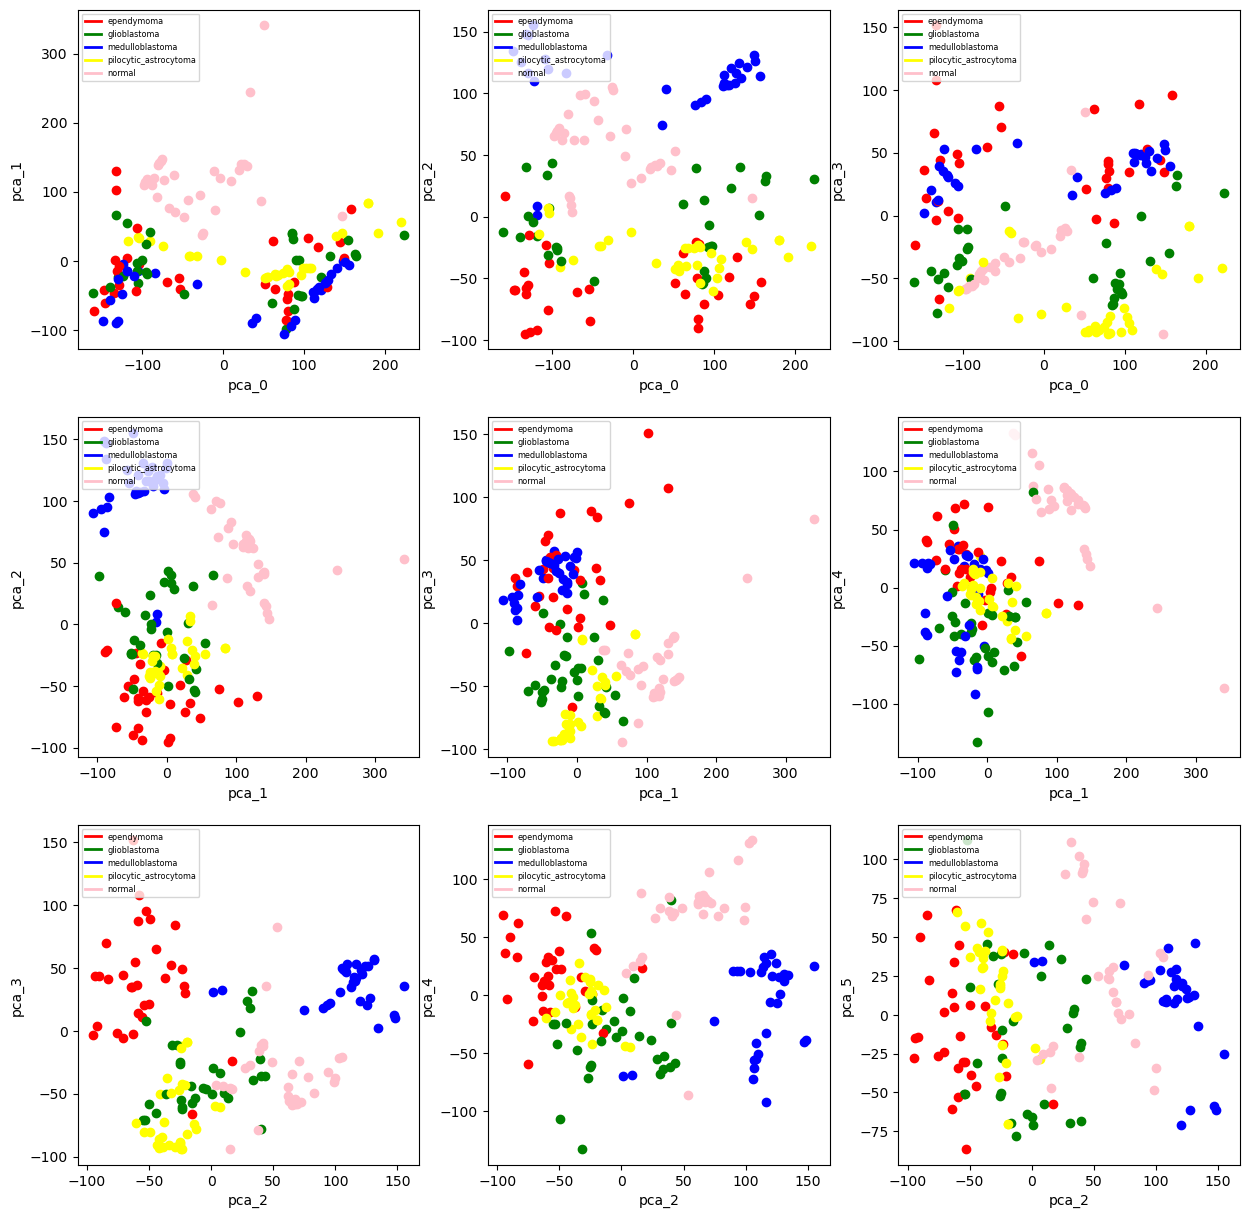

In [43]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
df_pca_SMOTE = pd.DataFrame(X_train_smote, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train_smote) , df_pca_SMOTE)

In [44]:
estimator_SMOTE = GridSearchCV(KNeighborsClassifier(), param_grid= params, verbose= 3)
estimator_SMOTE.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..............p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 2/5] END ..............p=1, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END ..............p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 4/5] END ..............p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END ..............p=1, weights=uniform;, score=0.812 total time=   0.0s
[CV 1/5] END .............p=1, weights=distance;, score=0.781 total time=   0.0s
[CV 2/5] END .............p=1, weights=distance;, score=0.688 total time=   0.0s
[CV 3/5] END .............p=1, weights=distance;, score=0.750 total time=   0.0s
[CV 4/5] END .............p=1, weights=distance;, score=0.719 total time=   0.0s
[CV 5/5] END .............p=1, weights=distance;, score=0.906 total time=   0.0s
[CV 1/5] END ..............p=2, weights=uniform;, score=0.875 total time=   0.0s
[CV 2/5] END ..............p=2, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'p': range(1, 10), 'weights': ['uniform', 'distance']},
             verbose=3)

Accuracy:  0.8974358974358975 F1 score:  0.9102198845788589


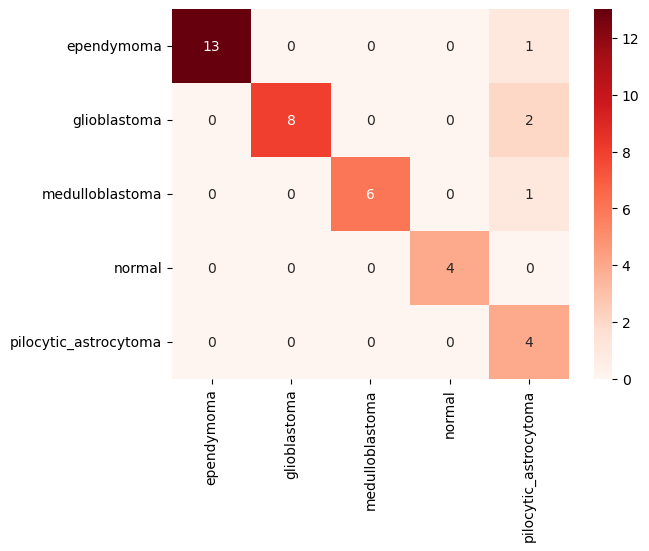

In [45]:
y_predict = estimator_SMOTE.best_estimator_.predict(X_test)
accuracy_SMOTE = accuracy_score(y_test,y_predict)
f1_SMOTE = f1_score(y_test,y_predict, average='weighted')
print('Accuracy: ',accuracy_score(y_test,y_predict),
      'F1 score: ', f1_score(y_test,y_predict, average = 'weighted'))
data = confusion_matrix(y_test, y_predict)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

In [46]:
labels = ['Accuracy NO SMOTE', 'F1 NO SMOTE', 'Accuracy SMOTE', 'F1 SMOTE']
values = [accuracy_NO_SMOTE,f1_NO_SMOTE,accuracy_SMOTE,f1_SMOTE]

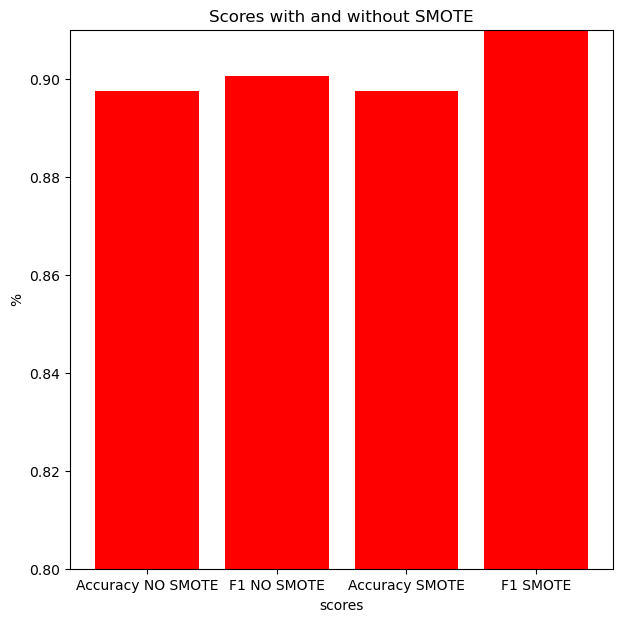

In [47]:
plt.figure(figsize=(7,7))
plt.bar(labels, values, color = 'red')
#plt.grid(alpha=0.9)
plt.ylim(0.8, 0.91)
plt.xlabel('scores')
plt.ylabel('%')
plt.title('Scores with and without SMOTE')
plt.show()